In [70]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Import the csv file

df = pd.read_csv("diabetes.csv")

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df.shape

(768, 9)

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#Checking the count of values 0 in the variables

variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for i in variables:
    c = 0
    for x in (df[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [16]:
#Replacing the missing values with the mean

variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    df[i].replace(0,df[i].mean(),inplace=True)


In [17]:
#Checking to make sure that incorrect values are replace

for i in variables:
    c = 0
    for x in (df[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


In [18]:
#cheking the missed values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


Text(0.5, 1.0, 'Diabetes Outcome')

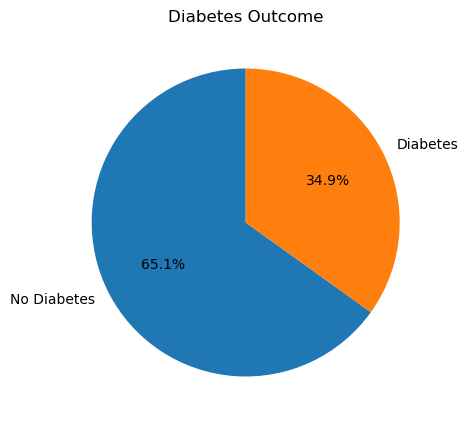

In [24]:
plt.figure(figsize=(5,5))
plt.pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'],autopct='%1.1f%%',shadow=False, startangle=90)
plt.title('Diabetes Outcome')

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


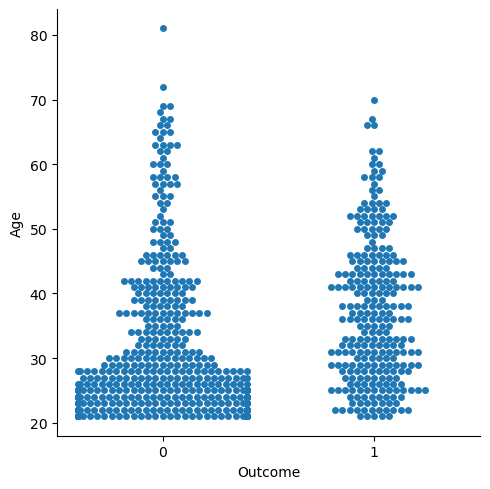

In [27]:
#Age distribution and Diabetes

sns.catplot(x="Outcome", y="Age", kind="swarm", data=df)

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

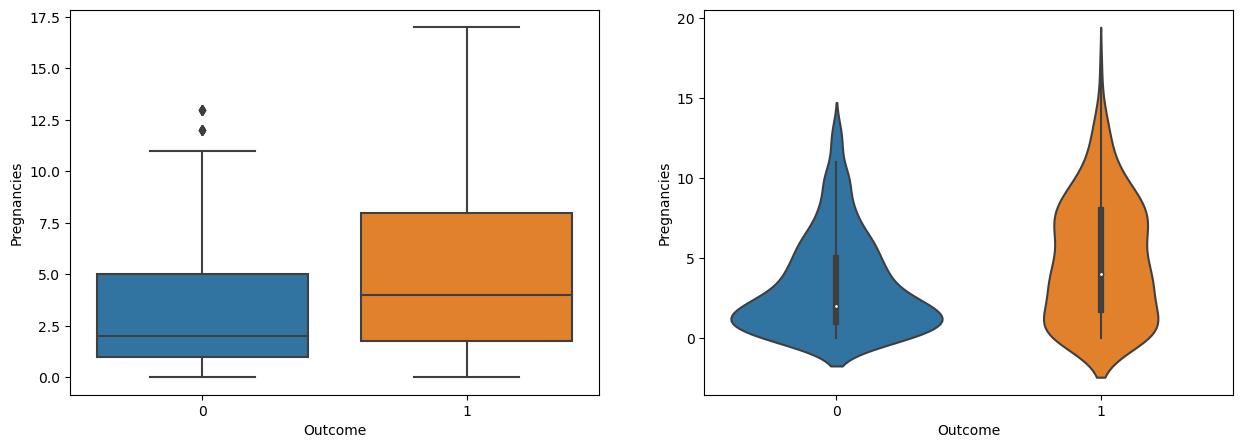

In [28]:
#Pregnancies and Diabetes

fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=ax[0])
sns.violinplot(x='Outcome',y='Pregnancies',data=df,ax=ax[1])


Text(0.5, 1.0, 'Glucose vs Diabetes')

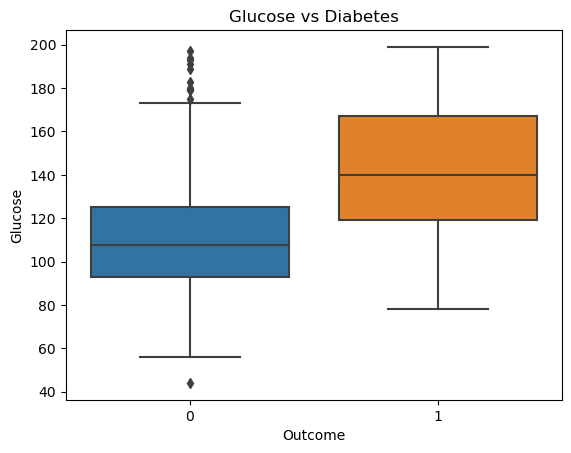

In [29]:
#Glucose and Diabetes

sns.boxplot(x='Outcome', y='Glucose', data=df).set_title('Glucose vs Diabetes')

Text(0.5, 1.0, 'BloodPressure vs Diabetes ')

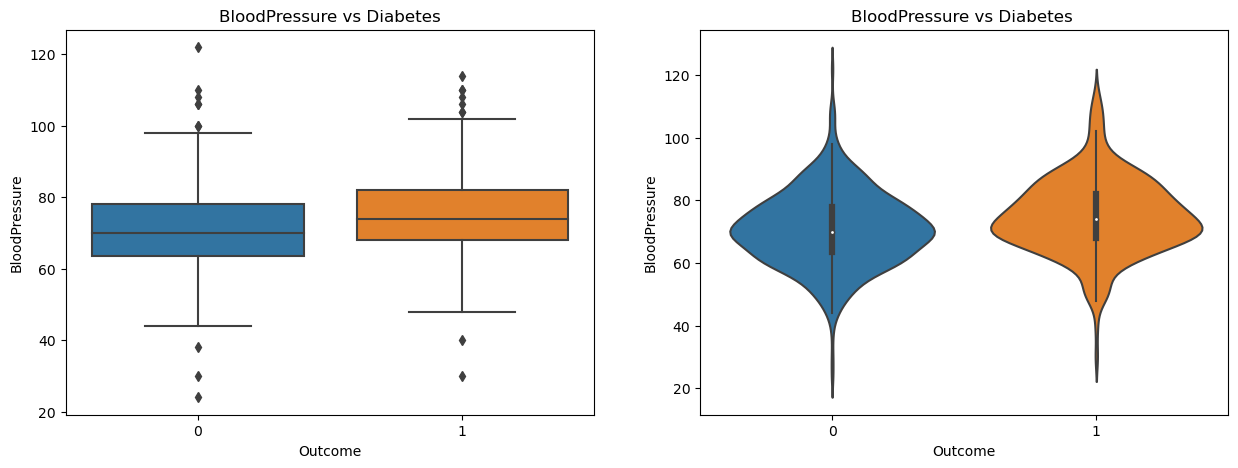

In [33]:
#Blood Pressuse and Diabetes

fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df, ax=ax[0]).set_title('BloodPressure vs Diabetes')
sns.violinplot(x='Outcome', y='BloodPressure', data=df, ax=ax[1]).set_title('BloodPressure vs Diabetes ')

Text(0.5, 1.0, 'SkinThickness vs Diabetes')

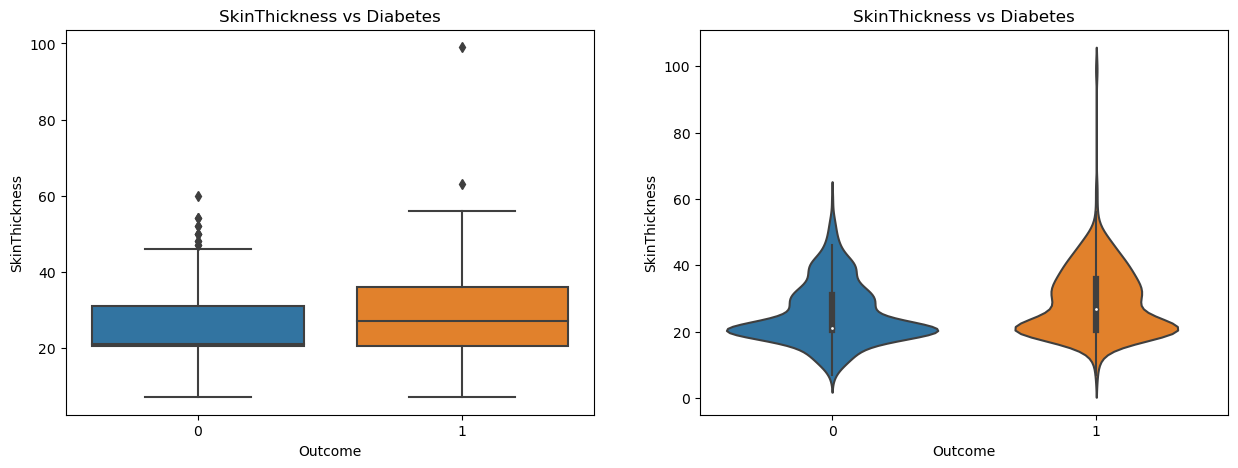

In [34]:
#Skin Thickness and Diabetes

fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='SkinThickness', data=df,ax=ax[0]).set_title('SkinThickness vs Diabetes')
sns.violinplot(x='Outcome', y='SkinThickness', data=df,ax=ax[1]).set_title('SkinThickness vs Diabetes')

Text(0.5, 1.0, 'Correlation Heatmap')

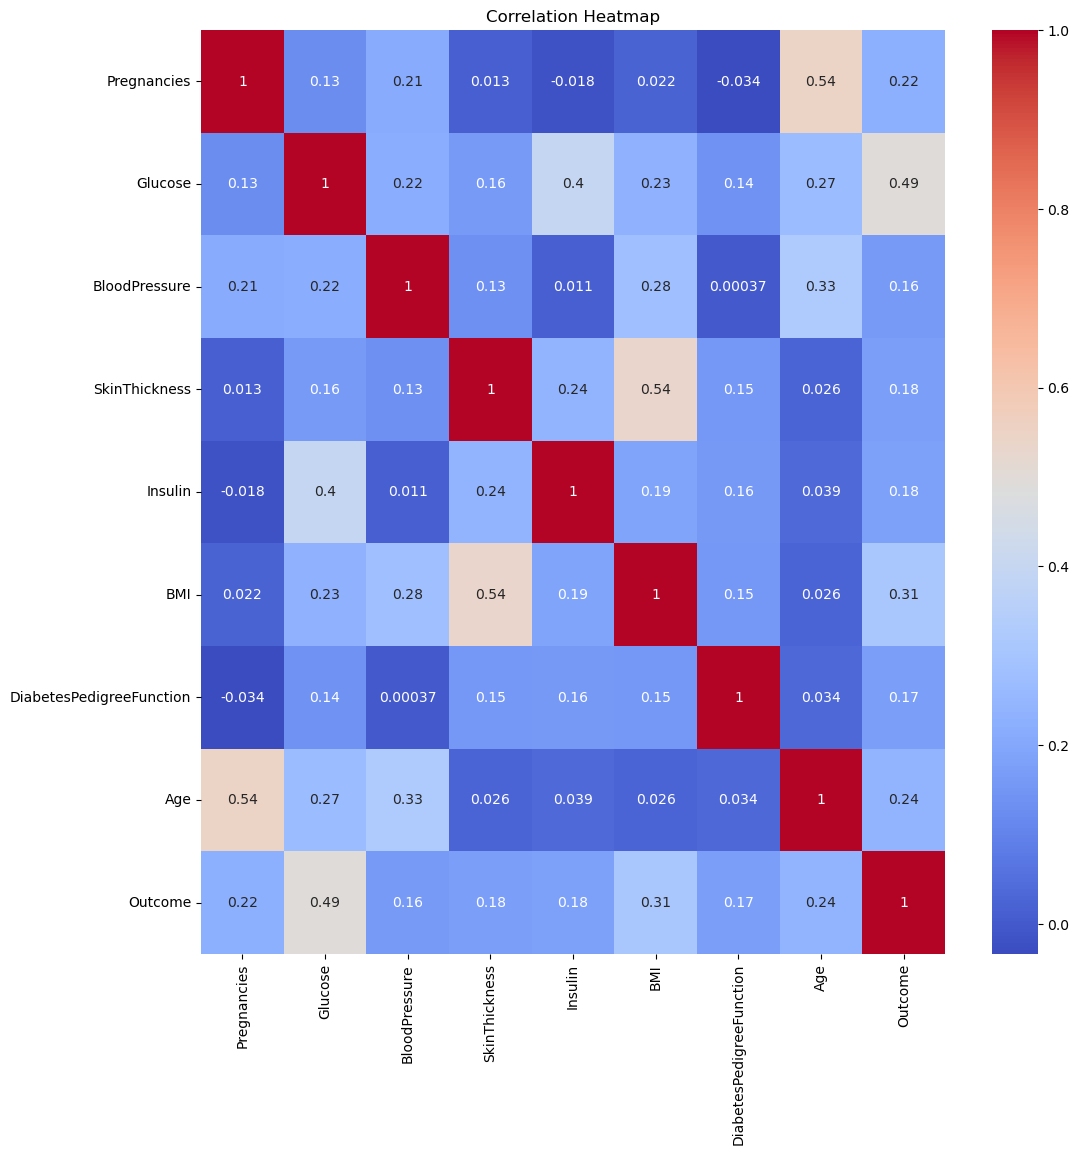

In [35]:
#Coorelation Matrix 

fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df, ax=ax[0]).set_title('BloodPressure vs Diabetes')
sns.violinplot(x='Outcome', y='BloodPressure', data=df, ax=ax[1]).set_title('BloodPressure vs Diabetes ')

In [40]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df, ax=ax[0]).set_title('BloodPressure vs Diabetes')
sns.violinplot(x='Outcome', y='BloodPressure', data=df, ax=ax[1]).set_title('BloodPressure vs Diabetes ')

In [41]:
#logitic Regression - Build the Model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [44]:
#training the model
lr.fit(X_train,y_train)
#training accuracy
lr.score(X_train,y_train)


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7719869706840391

In [43]:
#predicted outcomes

lr_pred = lr.predict(X_test)


In [45]:
#Random - Build the model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc

RandomForestClassifier(random_state=42)

In [46]:

rfc.fit(X_train, y_train)

rfc.score(X_train, y_train)

1.0

In [47]:
#predicted outcomes
rfc_pred = rfc.predict(X_test)

In [48]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=0)
svm


SVC(kernel='linear', random_state=0)

In [50]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test)


0.7597402597402597

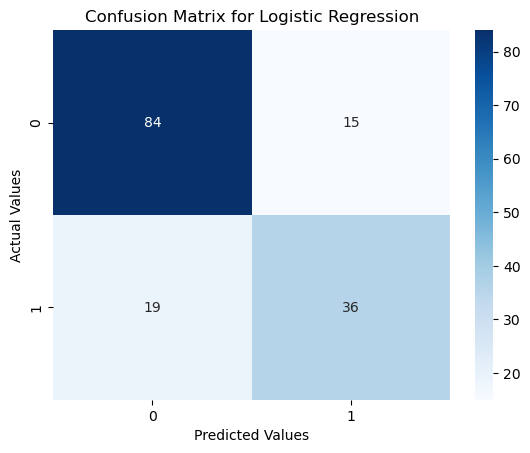

In [56]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3756\3125858802.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r', label='Actual Value',hist=False)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3756\3125858802.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

Text(0, 0.5, 'Count')

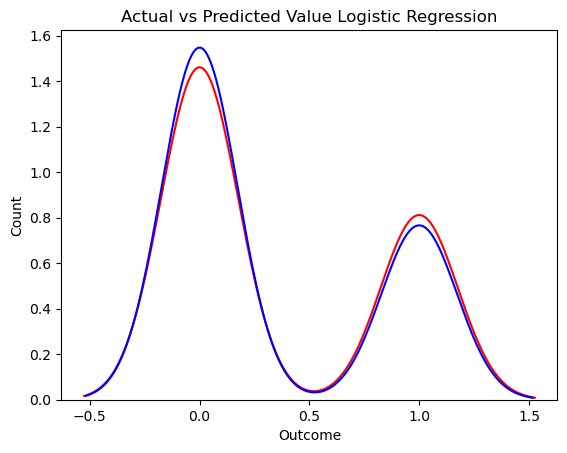

In [57]:
#Distribution plot

ax = sns.distplot(y_test, color='r', label='Actual Value',hist=False)
sns.distplot(lr_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

In [58]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



In [60]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
print('Accuracy Score: ',accuracy_score(y_test,lr_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,lr_pred))
print('R2 Score: ',r2_score(y_test,lr_pred))


Accuracy Score:  0.7792207792207793
Mean Absolute Error:  0.22077922077922077
Mean Squared Error:  0.22077922077922077
R2 Score:  0.038383838383838076


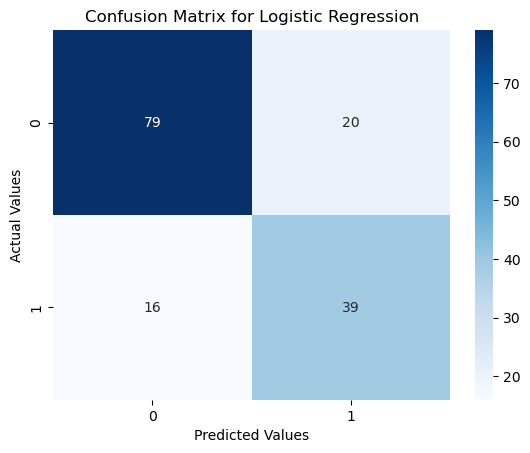

In [61]:
#Evaluating Random Forest Classifier


sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3756\1057851179.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r', label='Actual Value',hist=False)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3756\1057851179.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

Text(0, 0.5, 'Count')

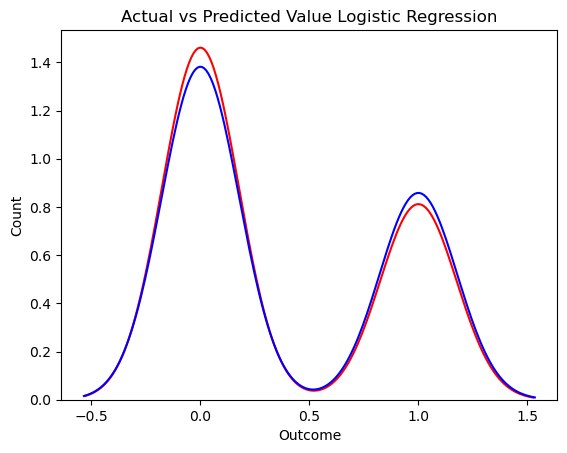

In [62]:
#Distribution Plot

ax = sns.distplot(y_test, color='r', label='Actual Value',hist=False)
sns.distplot(rfc_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

In [63]:
#Classification Report

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [65]:
print('Accuracy Score: ',accuracy_score(y_test,rfc_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,rfc_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,rfc_pred))
print('R2 Score: ',r2_score(y_test,rfc_pred))

Accuracy Score:  0.7662337662337663
Mean Absolute Error:  0.23376623376623376
Mean Squared Error:  0.23376623376623376
R2 Score:  -0.01818181818181852


Text(0.5, 1.0, 'Comparison of different models')

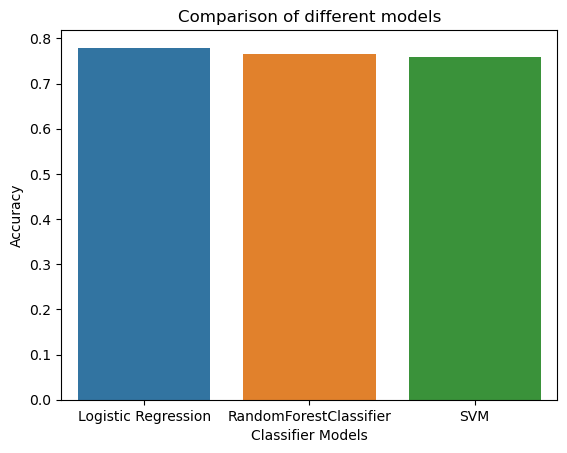

In [68]:
#Comparing the models

sns.barplot(x=['Logistic Regression', 'RandomForestClassifier', 'SVM'], y=[0.7792207792207793,0.7662337662337663,0.7597402597402597])
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

#Conclusion
From the exploratory data analysis, I have concluded that the risk of diabetes depends
upon the following factors:
1. Glucose level
2. Number of pregnancies
3. Skin Thickness
4. Insulin level
5. BMI
With in increase in Glucose level, insulin level, BMI and number of pregnancies, the risk
of diabetes increases. However, the number of pregnancies have strange effect of risk of diabetes which couldn't 
be explained by the data. The risk of diabetes also increases with increase in skin thickness.
Coming to the classification models, Logistic Regression outperformed Random Forest
and SVM with 78% accuracy. The accuracy of the model can be improved by increasing
the size of the dataset. The dataset used for this project was very small and had only 768
rows